In [115]:
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
dataset = pd.read_csv('dataset.csv')

In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
corr = dataset.corr()

In [9]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, '[0]: Does not have heart disease [1]: Does have heart disease')

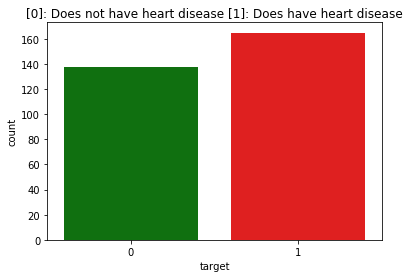

In [19]:
sns.countplot(dataset.target, palette=['green', 'red'])
plt.title('[0]: Does not have heart disease [1]: Does have heart disease')

[]

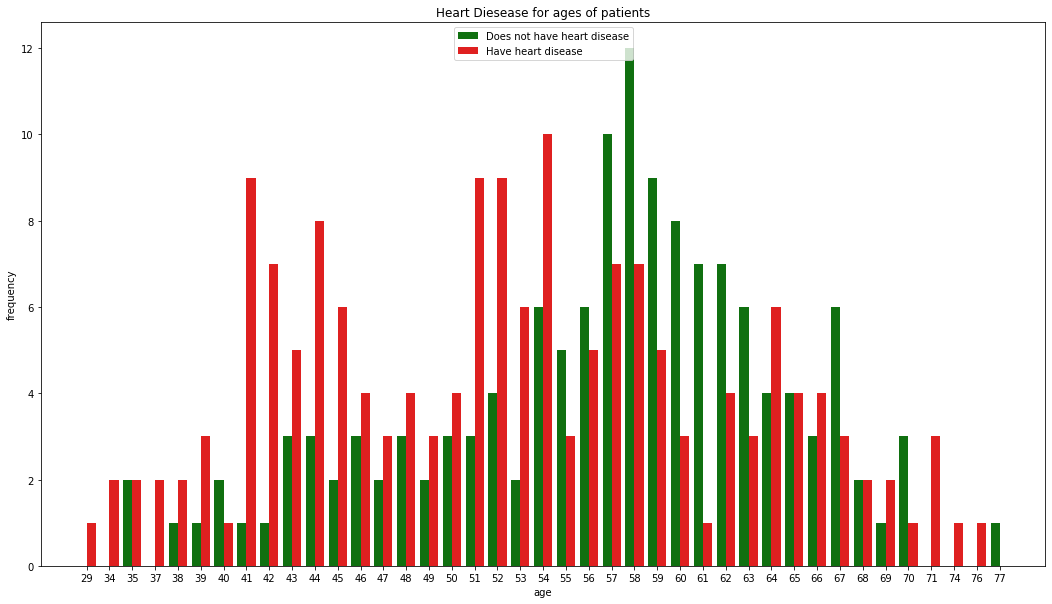

In [20]:
plt.figure(figsize=(18, 10))
sns.countplot(x="age", hue="target", data=dataset, palette=['green', 'red'])
plt.legend(["Does not have heart disease", "Have heart disease"])
plt.title("Heart Diesease for ages of patients")
plt.xlabel("age")
plt.ylabel("frequency")
plt.plot()

[]

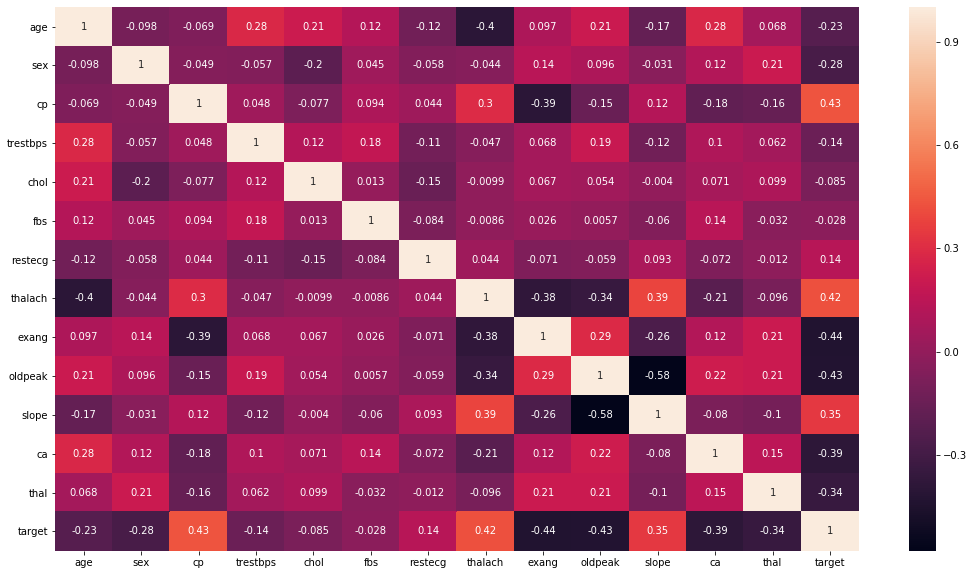

In [21]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [39]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2


In [98]:
clf = LogisticRegression()

In [99]:
clf.fit(x_train, y_train)

C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred = clf.predict(x_test)

In [101]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [46]:
log_score = accuracy_score(y_test, y_pred)

In [47]:
log_score

0.8351648351648352

In [48]:
log_cm = confusion_matrix(y_test, y_pred)

In [49]:
log_cm

array([[31,  8],
       [ 7, 45]], dtype=int64)

In [71]:
clf = DecisionTreeClassifier()

In [72]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
y_pred = clf.predict(x_test)

In [74]:
dec_score = accuracy_score(y_test, y_pred)

In [75]:
dec_cm = confusion_matrix(y_test, y_pred)

In [76]:
dec_score

0.7912087912087912

In [77]:
dec_cm

array([[29, 10],
       [ 9, 43]], dtype=int64)

In [78]:
dot_data = StringIO()

In [79]:
export_graphviz(clf, out_file=dot_data)

In [81]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dot_data.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\ngini = 0.498\\nsamples = 212\\nvalue = [99, 113]"] ;\n1 [label="X[11] <= 0.5\\ngini = 0.392\\nsamples = 101\\nvalue = [74, 27]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[12] <= 2.5\\ngini = 0.496\\nsamples = 44\\nvalue = [20, 24]"] ;\n1 -> 2 ;\n3 [label="X[7] <= 125.5\\ngini = 0.355\\nsamples = 26\\nvalue = [6, 20]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0]"] ;\n3 -> 4 ;\n5 [label="X[0] <= 58.0\\ngini = 0.278\\nsamples = 24\\nvalue = [4, 20]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 17\\nvalue = [0, 17]"] ;\n5 -> 6 ;\n7 [label="X[4] <= 260.0\\ngini = 0.49\\nsamples = 7\\nvalue = [4, 3]"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n7 -> 8 ;\n9 [label="X[3] <= 134.0\\ngini = 0.375\\nsamples = 4\\nvalue = [1, 3]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n9 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 3\\nvalue

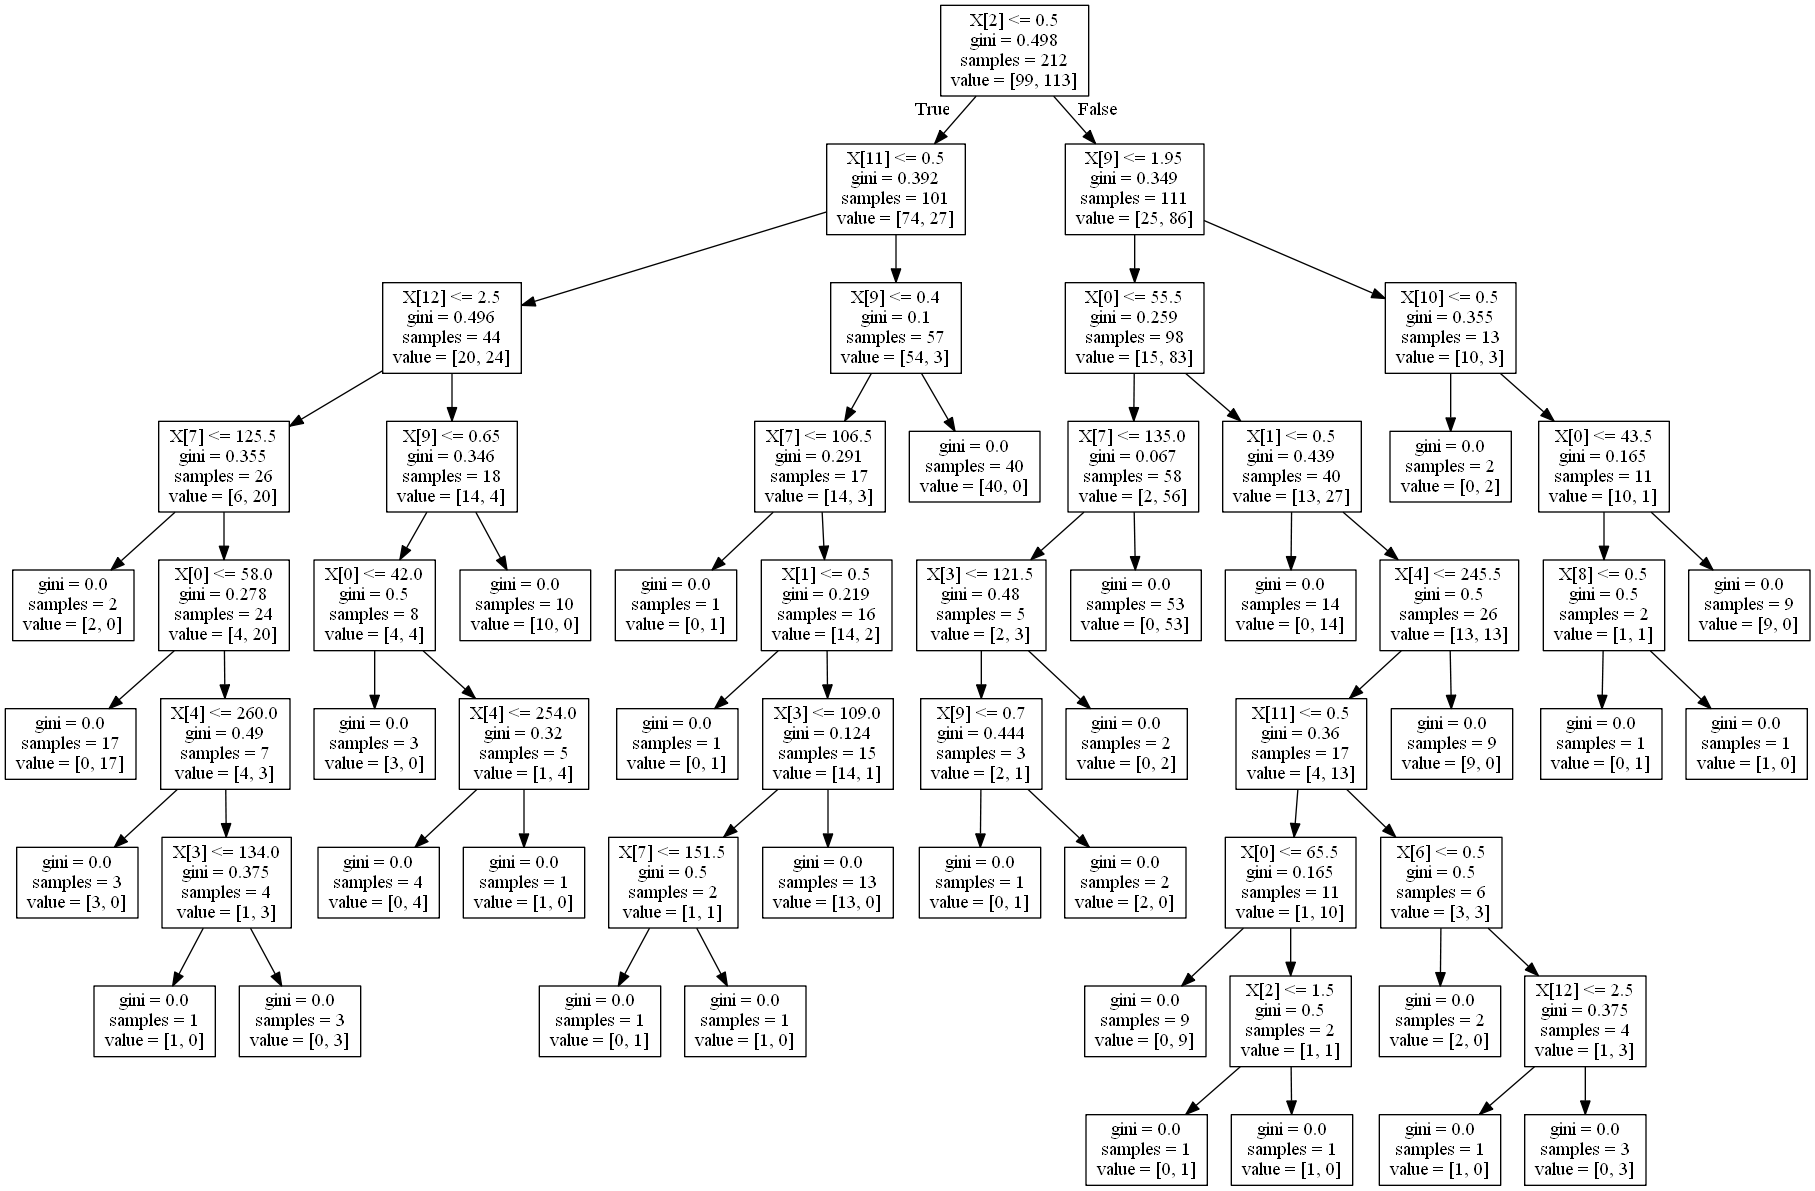

In [65]:
Image(graph.create_png())

In [102]:
clf = RandomForestClassifier()

In [103]:
clf.fit(x_train, y_train)

C:\Users\Intellipaat-Team\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
y_pred = clf.predict(x_test)

In [105]:
rf_score = accuracy_score(y_test, y_pred)

In [106]:
rf_cm = confusion_matrix(y_test, y_pred)

In [107]:
rf_score

0.7252747252747253

In [108]:
rf_cm

array([[31,  8],
       [17, 35]], dtype=int64)

In [109]:
dot_data = StringIO()

In [110]:
export_graphviz(clf.estimators_[0], out_file=dot_data)

In [111]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# dot_data.getvalue()

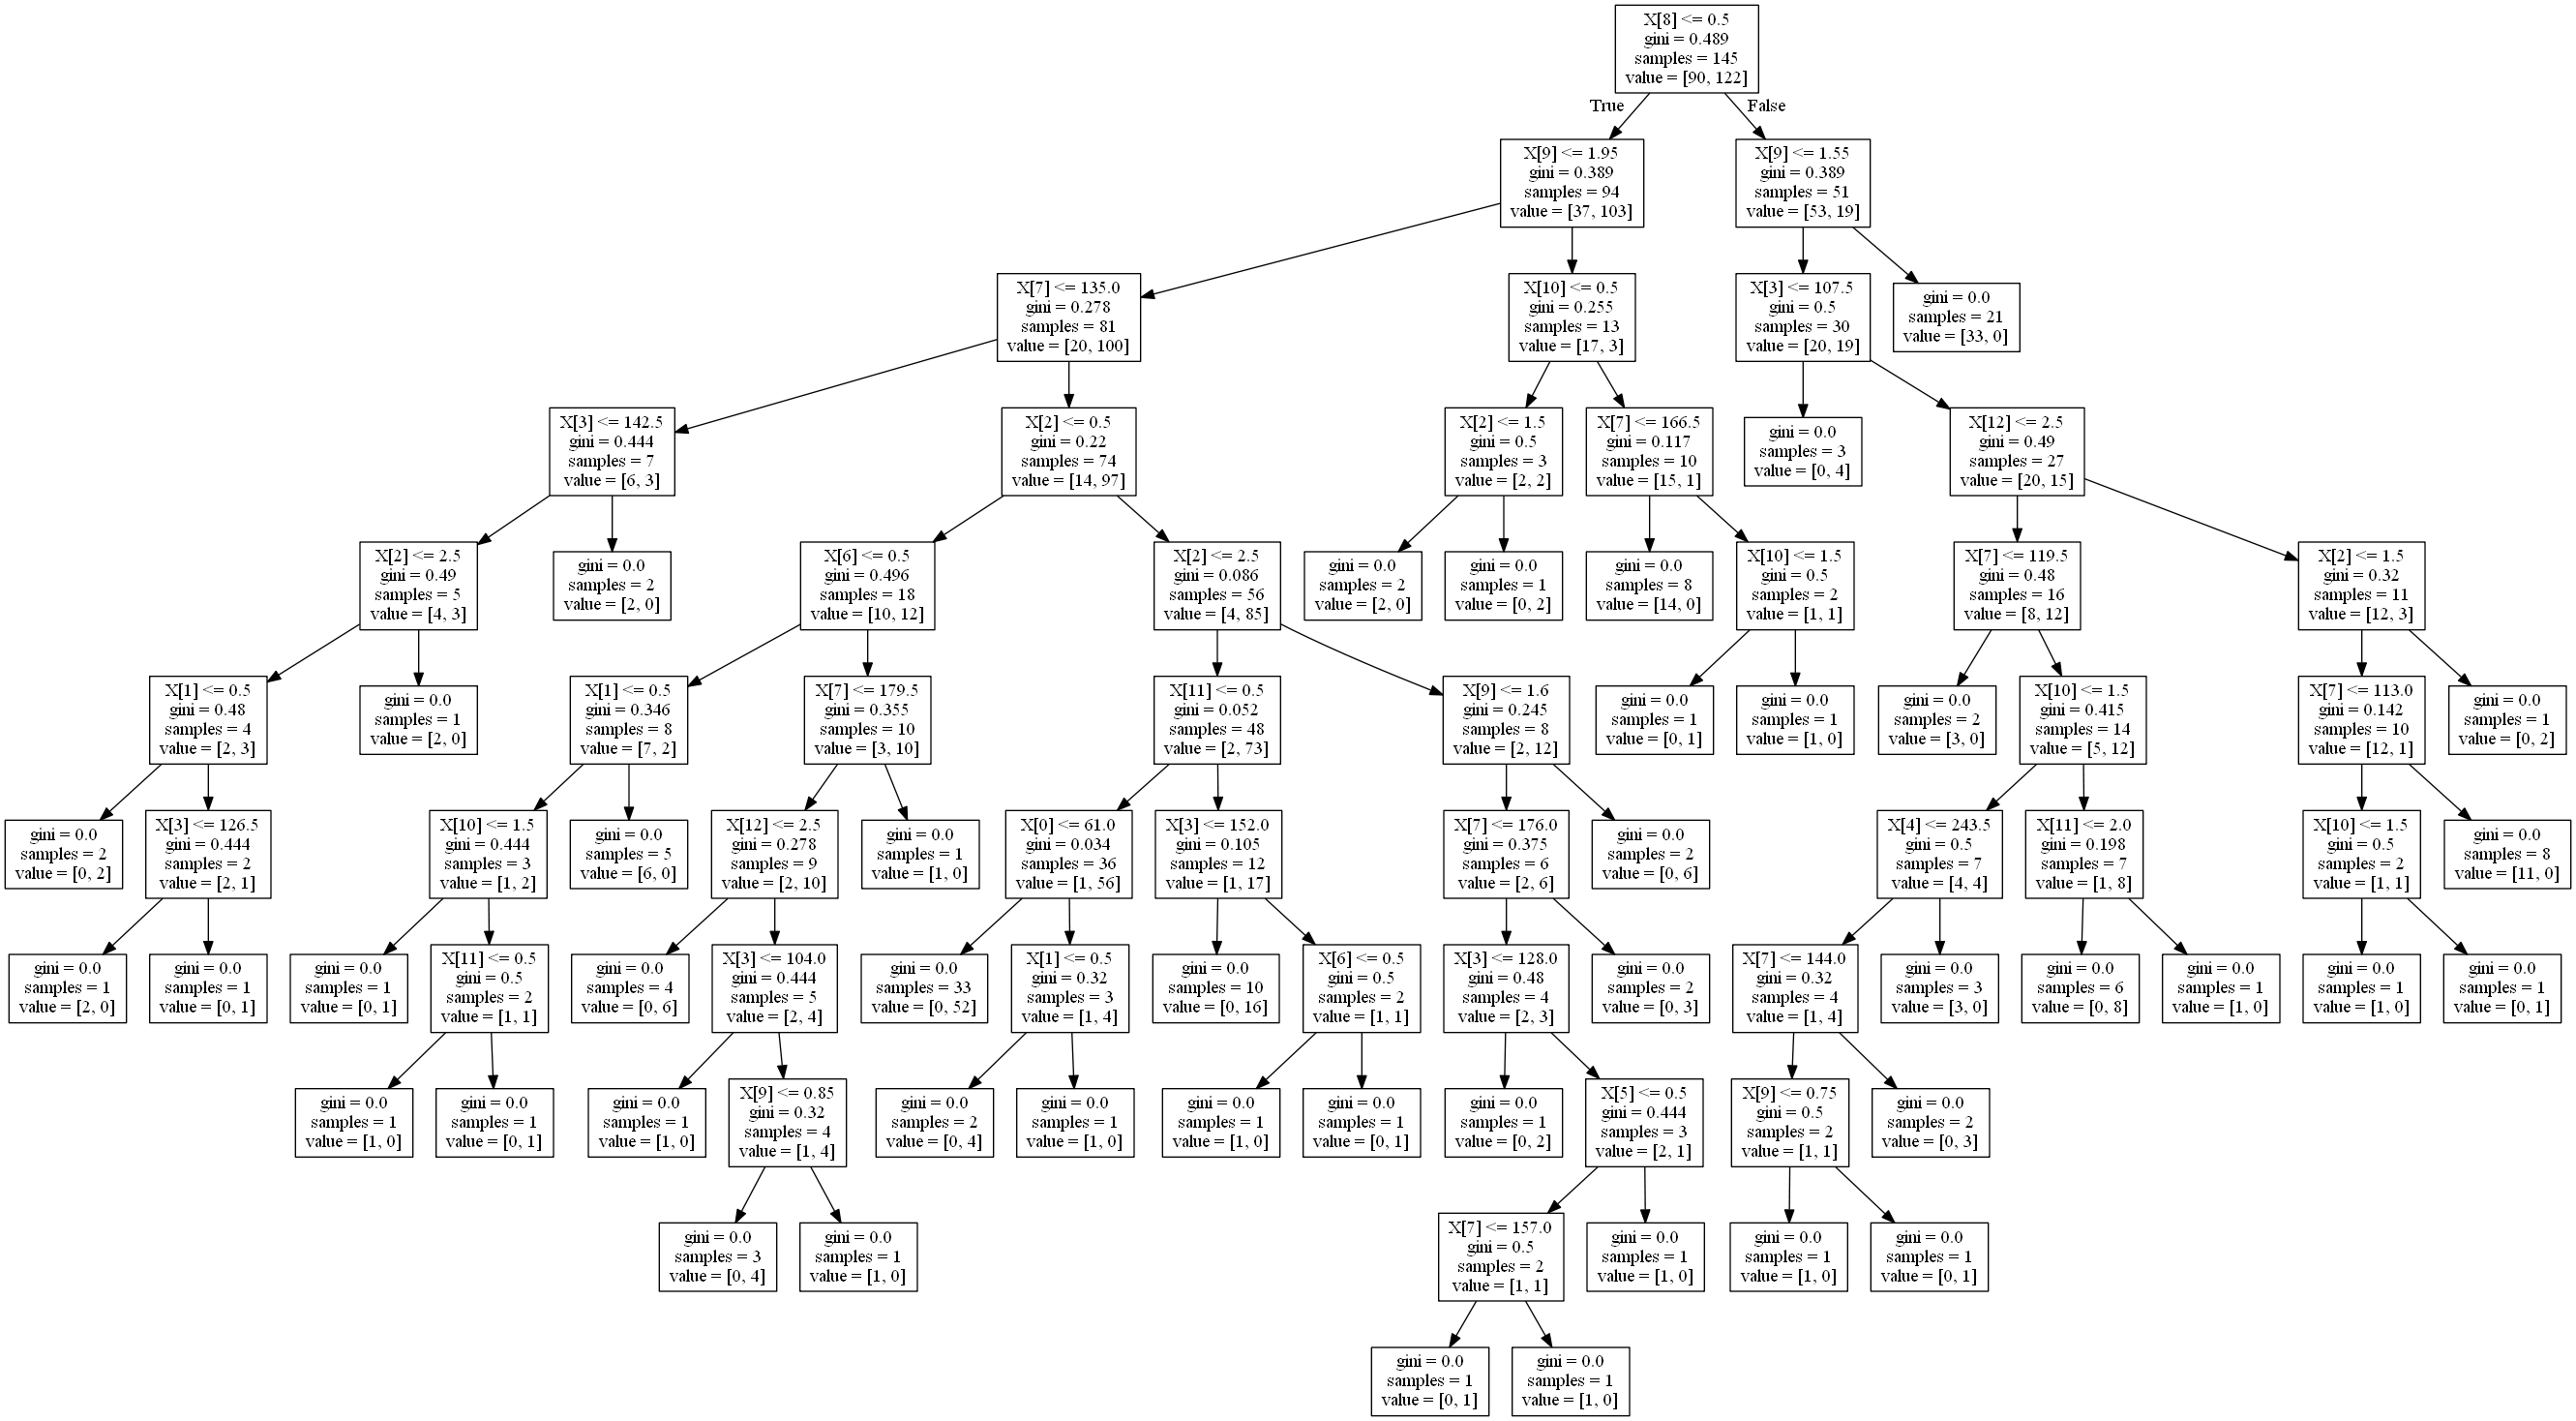

In [112]:
Image(graph.create_png())

In [91]:
scores_dic = { 'logistic_reg': [log_score], 'decision_tree': [dec_score], 'random_forest': [rf_score] }

In [92]:
scores_df = pd.DataFrame(scores_dic)

In [93]:
scores_df

,logistic_reg,decision_tree,random_forest
0,0.835165,0.791209,0.725275


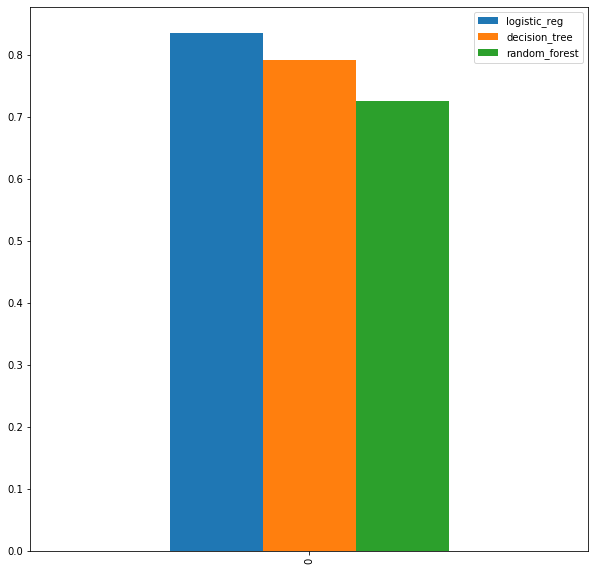

In [94]:
scores_df.plot(kind='bar', figsize=(10, 10))

In [95]:
matrix_dic = { 'logistic_reg': log_cm, 'decision_tree': dec_cm, 'random_forest': rf_cm }

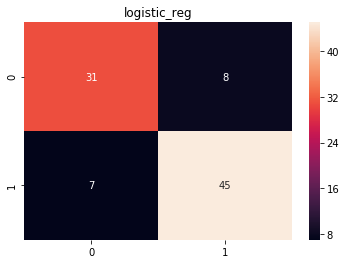

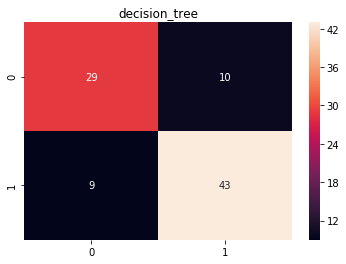

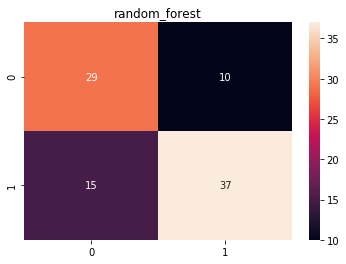

In [97]:
for label, matrix in matrix_dic.items():
    plt.title(label=label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [116]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.79      0.71        39\n           1       0.81      0.67      0.74        52\n\n    accuracy                           0.73        91\n   macro avg       0.73      0.73      0.72        91\nweighted avg       0.74      0.73      0.73        91\n'